/Users/kimberly/.pyenv/versions/megapis/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


all days describe=
            Result        by4         by5      after4      after5
count  135.000000  135.00000  135.000000  135.000000  135.000000
mean   366.718519  286.17037  331.096296   80.548148   35.622222
std     38.837521   43.83884   38.174750   39.911043   24.012704
min    214.000000  159.00000  201.000000    0.000000    0.000000
25%    350.000000  258.00000  313.500000   47.500000   18.000000
50%    372.000000  284.00000  333.000000   85.000000   31.000000
75%    389.500000  321.50000  353.000000  110.000000   51.000000
max    447.000000  384.00000  410.000000  224.000000  135.000000
135 school days; 15  high traffic 11 % high

4pm: coeff=[0.47800594] intercept=229.92738227947893
score=0.29112647065586206
count	4pm
300 373
310 378
320 383
330 388
340 392
350 397
360 402
370 407
380 412
390 416
400 421


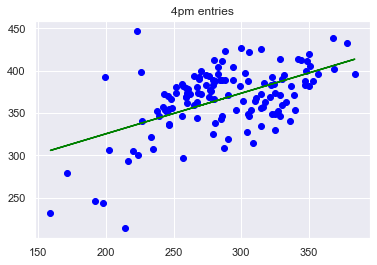


4pm Fri: coeff=[0.20480783] intercept=298.8521592054124
score=0.054213910388341995
count	4pm Fri
300 360
310 362
320 364
330 366
340 368
350 371
360 373
370 375
380 377
390 379
400 381


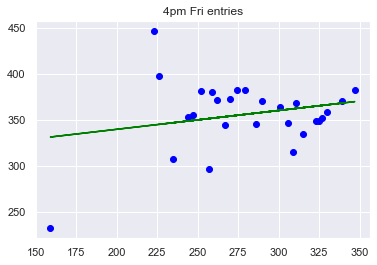


4pm Wed: coeff=[0.38205408] intercept=252.6411111285747
score=0.22682024519596114
count	4pm Wed
300 367
310 371
320 375
330 379
340 383
350 386
360 390
370 394
380 398
390 402
400 405


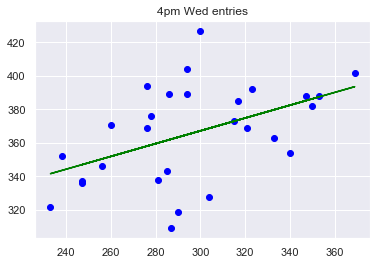


4pm Thu: coeff=[0.53177011] intercept=217.05997456652906
score=0.3329859410377358
count	4pm Thu
300 377
310 382
320 387
330 393
340 398
350 403
360 408
370 414
380 419
390 424
400 430


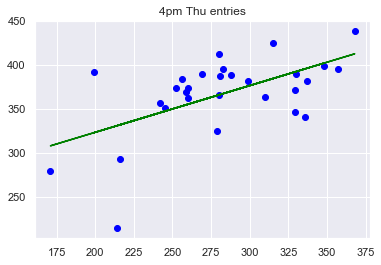


4pm Mon: coeff=[0.77671374] intercept=145.47044325530888
score=0.595541439553491
count	4pm Mon
300 378
310 386
320 394
330 402
340 410
350 417
360 425
370 433
380 441
390 448
400 456


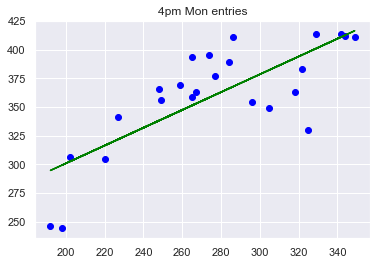


4pm Tue: coeff=[0.36467744] intercept=276.48578810475783
score=0.300187528379832
count	4pm Tue
300 386
310 390
320 393
330 397
340 400
350 404
360 408
370 411
380 415
390 419
400 422


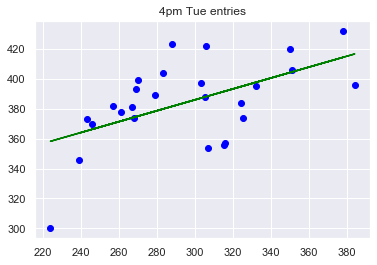


5pm: coeff=[0.81967875] intercept=95.32592126334544
score=0.649137594874511
count	5pm
300 341
310 349
320 358
330 366
340 374
350 382
360 390
370 399
380 407
390 415
400 423


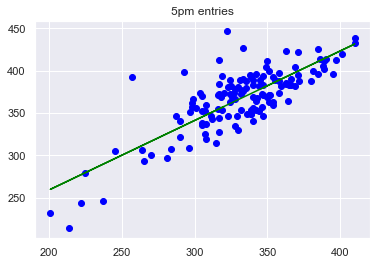


5pm Fri: coeff=[0.80415058] intercept=95.13230191830831
score=0.4667306849564968
count	5pm Fri
300 336
310 344
320 352
330 361
340 369
350 377
360 385
370 393
380 401
390 409
400 417


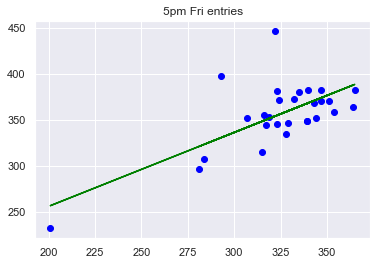


5pm Wed: coeff=[0.82246318] intercept=90.27957124687947
score=0.5902299803028328
count	5pm Wed
300 337
310 345
320 353
330 362
340 370
350 378
360 386
370 395
380 403
390 411
400 419


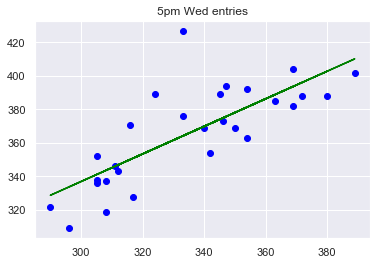


5pm Thu: coeff=[0.78390363] intercept=111.88546713631905
score=0.6249377438906174
count	5pm Thu
300 347
310 355
320 363
330 371
340 378
350 386
360 394
370 402
380 410
390 418
400 425


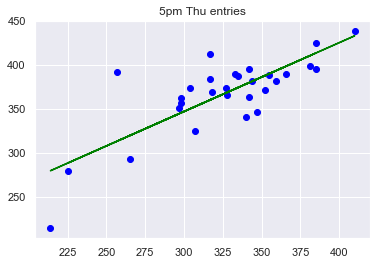


5pm Mon: coeff=[0.90062646] intercept=68.80546348080941
score=0.8166996766807328
count	5pm Mon
300 339
310 348
320 357
330 366
340 375
350 384
360 393
370 402
380 411
390 420
400 429


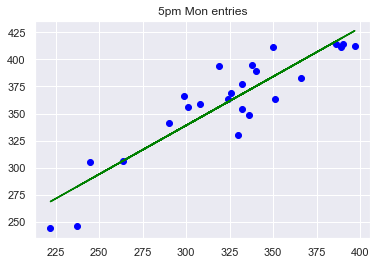


5pm Tue: coeff=[0.68903061] intercept=145.4910421178356
score=0.6602269205931767
count	5pm Tue
300 352
310 359
320 366
330 373
340 380
350 387
360 394
370 400
380 407
390 414
400 421


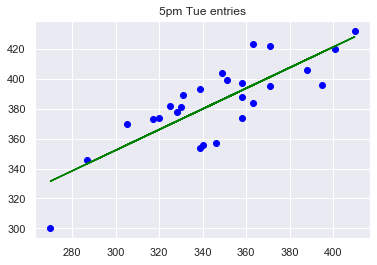

In [87]:
import re

from dateutil import tz
import numpy as np
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn; seaborn.set()
from sklearn.linear_model import LinearRegression

%matplotlib inline 
pt = tz.gettz('America/Los_Angeles')
utc = tz.gettz('UTC')

# 'Sat Sep 01 2018 09:00:00 GMT+0100 (British Summer Time)'
to_pacific = lambda dt: pd.datetime.strptime(
    re.sub(r'\w+ (.*) GMT.*', r'\1', dt), '%b %d %Y %H:%M:%S').\
    replace(tzinfo=utc).astimezone(pt)

data = pd.read_csv('hourly_entries_all.csv', parse_dates=['Index'], date_parser=to_pacific)
# remove negatives
data = data[data['Result'] >= 0]
# add early, late
data['by4'] = data['Result'] * (data['Index'].dt.hour < 16).astype(int)
data['by5'] = data['Result'] * (data['Index'].dt.hour < 17).astype(int)
data['after4'] = data['Result'] * (data['Index'].dt.hour >= 16).astype(int)
data['after5'] = data['Result'] * (data['Index'].dt.hour >= 17).astype(int)
#print('data=', len(data), '\n', data[85:90])

# roll up to daily
daily = data.set_index(['Index']).resample('D').sum()

# only school days
school_days = daily[daily['Result'] > 200]
# add weekday
school_days.reset_index(inplace=True)
school_days['weekday'] = school_days['Index'].apply(lambda d: d.strftime('%a'))
school_days.set_index('Index', inplace=True)
#school_days.plot()

print('all days describe=\n', school_days.describe())
#high_traffic = school_days[school_days['early'] > 340]
#print('high days describe=\n', high_traffic.describe())
# by day
#by_day = school_days.groupby('weekday')
#print('by day describe=\n', by_day.describe())

print(len(school_days), 'school days;', len(high_traffic), ' high traffic',
     round(len(high_traffic)/len(school_days)*100), '% high')

# linear regression
x_predict = np.linspace(300, 400, 11)
weekdays = set(school_days['weekday'].values)

def linear_regression(x, y, label):
    model = LinearRegression().fit(x, y)
    predictions = model.predict(x_predict.reshape((-1, 1)))
    print('\n%s: coeff=%s intercept=%s' % (label, model.coef_, model.intercept_))
    print('score=%s' % model.score(x, y))
    print('count\t%s' % label)
    for idx, val in enumerate(x_predict):
        print(int(val), int(round(predictions[idx])))
    plt.scatter(x, y, color='blue')
    plt.plot(x, model.predict(x), color='green')
    plt.title('%s entries' % label)
    plt.show()

y_all = school_days['Result'].to_numpy()
for hour in [4, 5]:
    x_values = school_days['by%s' % hour]
    linear_regression(x_values.to_numpy().reshape((-1, 1)), y_all, '%spm' % hour)
    for weekday in weekdays:
        weekday_values = school_days[school_days['weekday'] == weekday]
        x_values = weekday_values['by%s' % hour]
        y_values = weekday_values['Result'].to_numpy()
        linear_regression(x_values.to_numpy().reshape((-1, 1)), y_values,
                          '%spm %s' % (hour, weekday))

